In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
#train test split.
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

#ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [2]:
tr=pd.read_csv("Train.csv")
tr.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
te=pd.read_csv("Test.csv")
te.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
print('Train set: ',tr.shape)
print('Test set: ',te.shape)

Train set:  (8523, 12)
Test set:  (5681, 11)


In [5]:
#column information
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
#column information
te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [7]:
#summary statistics
tr.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
#summary statistics
te.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [9]:
#missing values
print(tr.isnull().sum(),'\n')
print(tr.isnull().sum()/tr.shape[0]*100)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


In [10]:
#missing values
print(te.isnull().sum(),'\n')
print(te.isnull().sum()/te.shape[0]*100)

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64 

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64


In [11]:
tr['Outlet_Size'] = tr['Outlet_Size'].fillna(tr['Outlet_Size'].dropna().mode().values[0])


In [12]:
te['Outlet_Size'] = te['Outlet_Size'].fillna(te['Outlet_Size'].dropna().mode().values[0])


In [13]:
tr['Outlet_Size'].isnull().sum(),te['Outlet_Size'].isnull().sum()

(0, 0)

Text(0.5, 1.0, 'Item_Weight Boxplot')

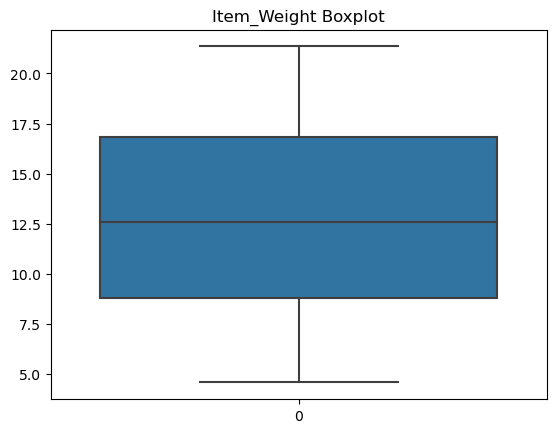

In [14]:
sns.boxplot(data=tr['Item_Weight'])
plt.title("Item_Weight Boxplot")

no outliers

In [15]:
tr['Item_Weight'] = tr['Item_Weight'].fillna(tr['Item_Weight'].dropna().mean())

In [16]:
te['Item_Weight'] = te['Item_Weight'].fillna(te['Item_Weight'].dropna().mean())


In [17]:
tr['Item_Weight'].isnull().sum(),te['Item_Weight'].isnull().sum()

(0, 0)

In [18]:
tr['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],['Low Fat','Low Fat','Regular'],inplace = True)


In [19]:
te['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [20]:
tr.Item_Fat_Content.value_counts(),te.Item_Fat_Content.value_counts()

(Low Fat    5517
 Regular    3006
 Name: Item_Fat_Content, dtype: int64,
 Low Fat    3668
 Regular    2013
 Name: Item_Fat_Content, dtype: int64)

In [21]:
tr['Outlet_Age']= tr['Outlet_Establishment_Year'].apply(lambda year: 2023 - year)
te['Outlet_Age']=te['Outlet_Establishment_Year'].apply(lambda year: 2023 - year)


In [22]:
print(tr['Outlet_Age'].head())
print(te['Outlet_Age'].head())

0    24
1    14
2    24
3    25
4    36
Name: Outlet_Age, dtype: int64
0    24
1    16
2    25
3    16
4    38
Name: Outlet_Age, dtype: int64


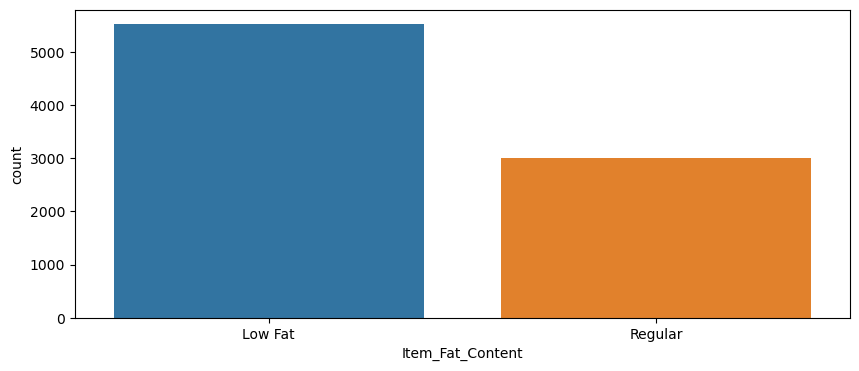

In [23]:
#univariate
#categorical columns
plt.figure(figsize=(10,4))
sns.countplot(x='Item_Fat_Content' , data=tr)
plt.xlabel('Item_Fat_Content')
plt.show()

 Most items sold are low fat

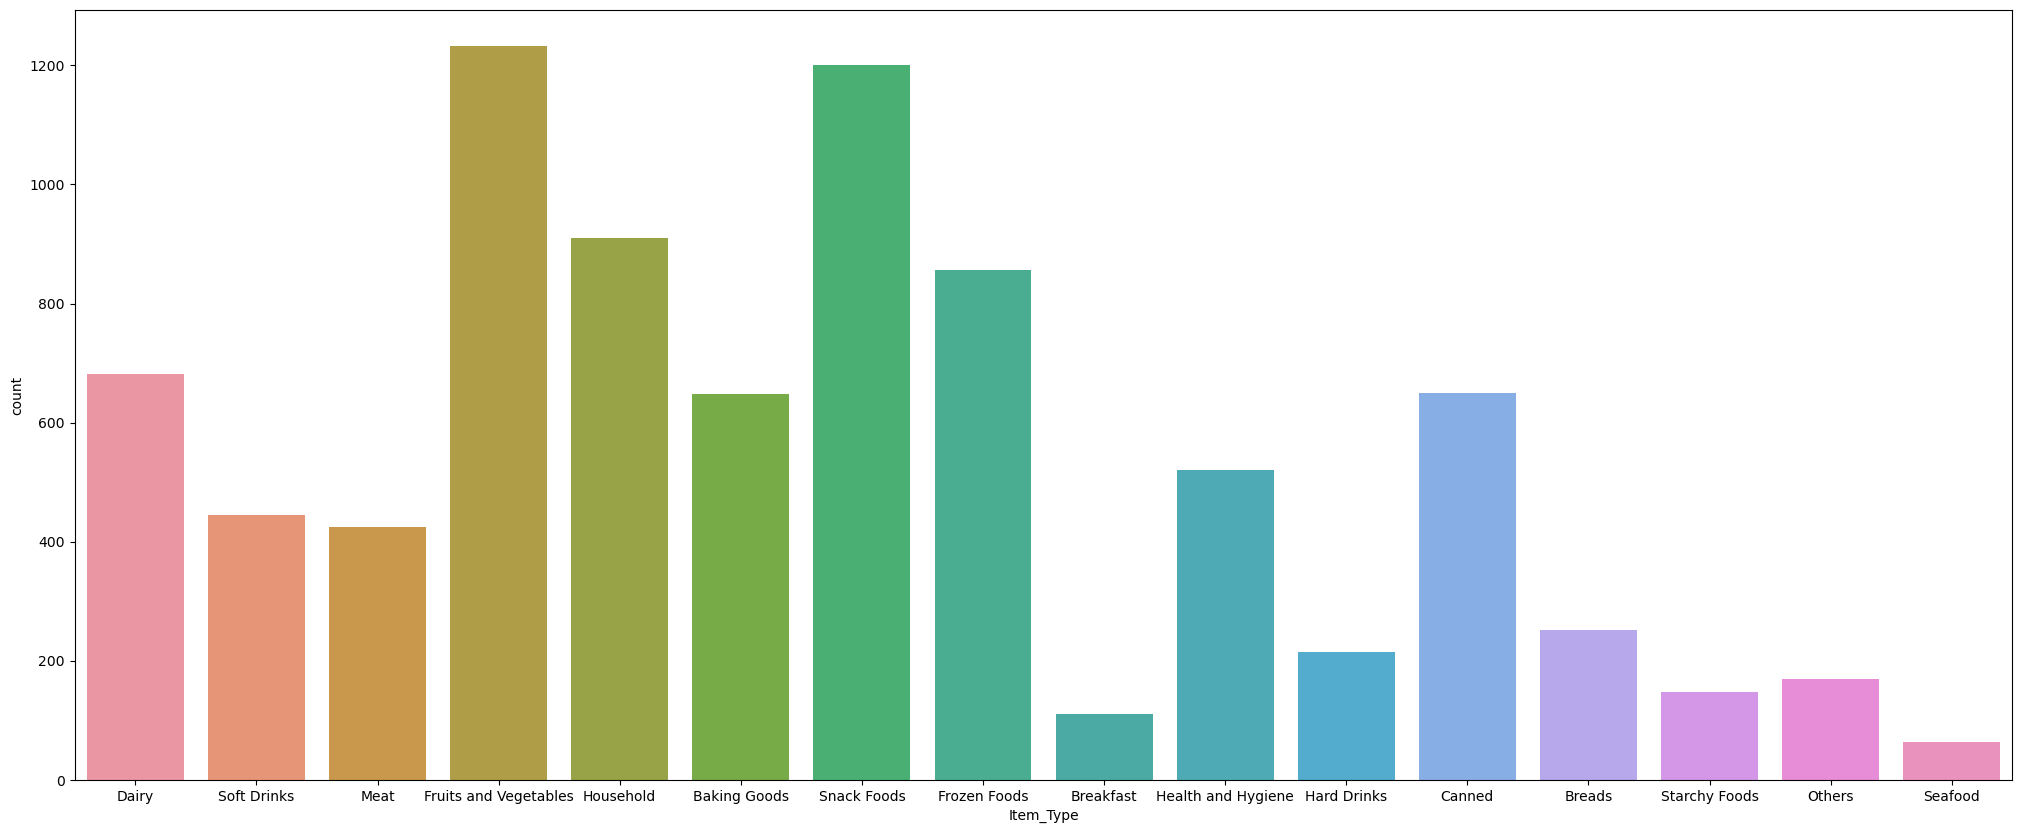

In [24]:
plt.figure(figsize=(25,10))
sns.countplot(x='Item_Type' , data=tr)
plt.xlabel('Item_Type')
plt.show()

Item types that are distictly popular are fruits and vegetables and snack foods.

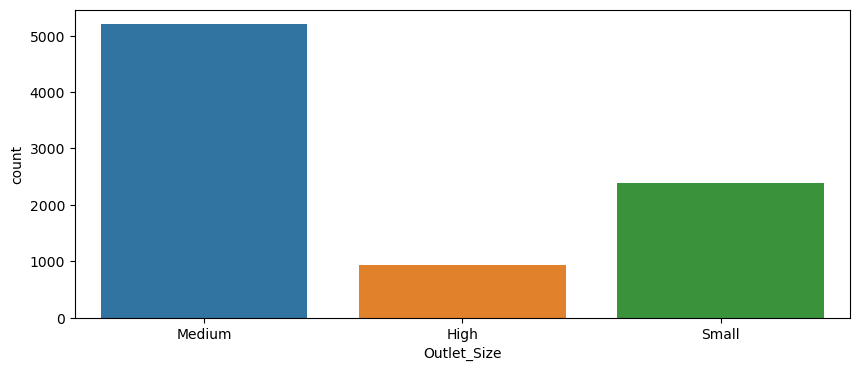

In [25]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Size' , data=tr)
plt.xlabel('Outlet_Size')
plt.show()

 outlets are mostly medium sized in our data.

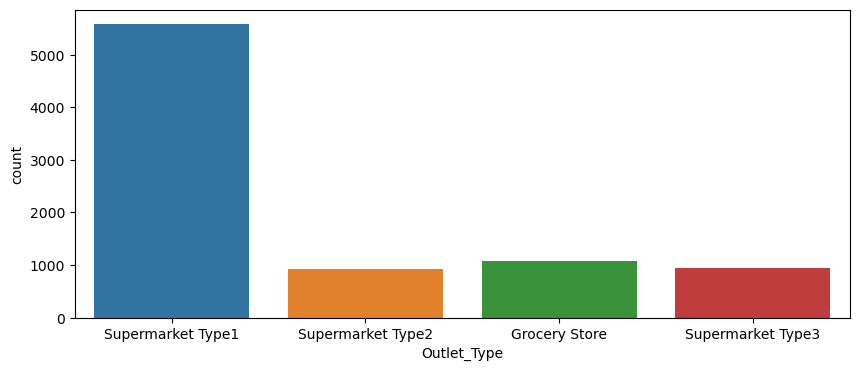

In [26]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type' , data=tr)
plt.xlabel('Outlet_Type')
plt.show()

By a wide margin the mode outlet type is Supermarket Type1

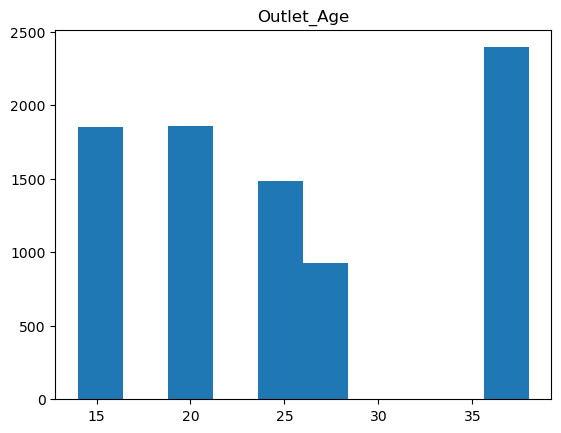

In [27]:
#bivariate
#numeric columns
plt.hist(tr['Outlet_Age'])
plt.title("Outlet_Age")
plt.show()

most common outlets are 35 years old.

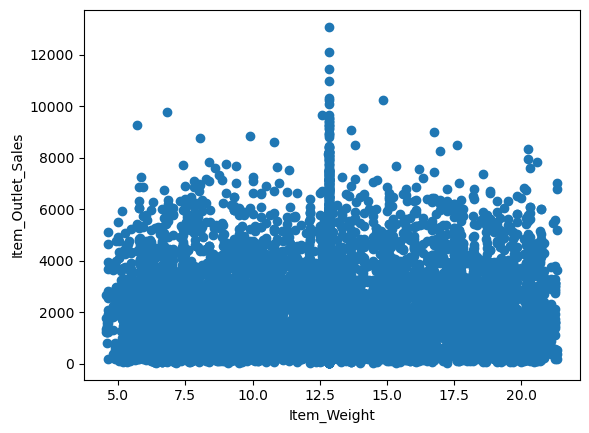

In [28]:
plt.scatter(x=tr['Item_Weight'],y=tr['Item_Outlet_Sales'])
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

data is very spreaded, no specific pattern.

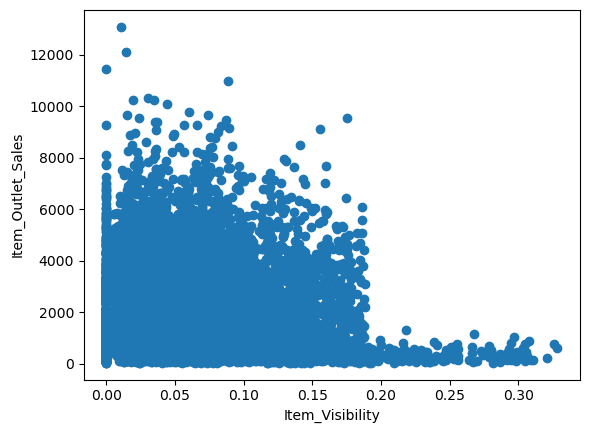

In [29]:
plt.scatter(x=tr['Item_Visibility'],y=tr['Item_Outlet_Sales'])
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.show()

Appears to be spreaded as well but some concentration around the (0,0) indicate small visibility items are not selling well is some cases.

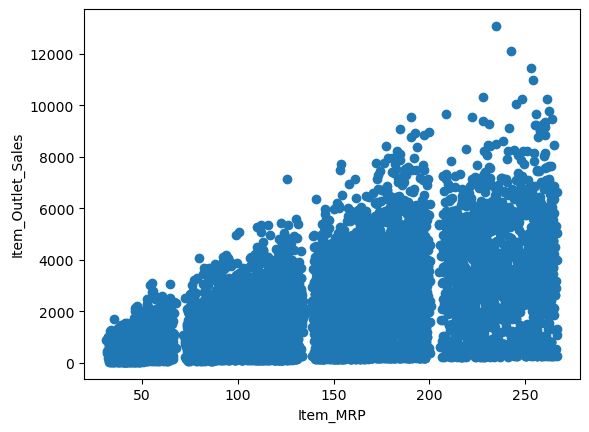

In [30]:
plt.scatter(x=tr['Item_MRP'],y=tr['Item_Outlet_Sales'])
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

Items with higher MRP tend to sell better in most cases.

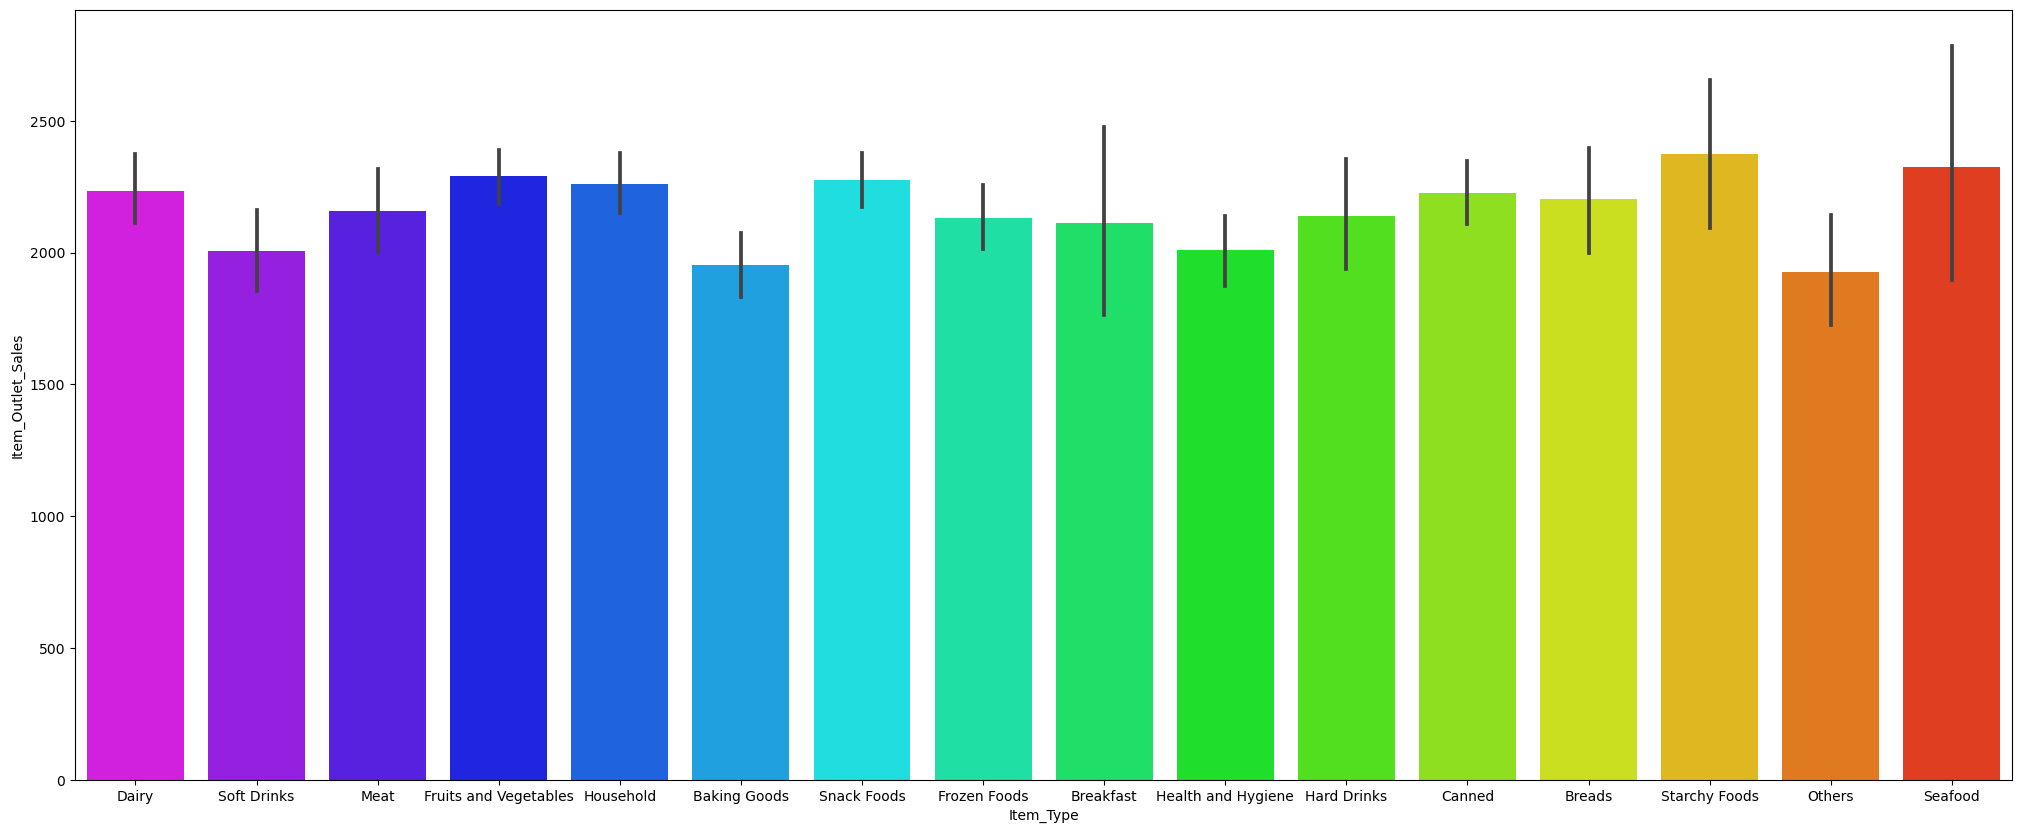

In [31]:
#multivariate
plt.figure(figsize=(25,10))
sns.barplot(x=tr['Item_Type'],y=tr['Item_Outlet_Sales'],palette='gist_rainbow_r')
plt.xlabel('Item_Type')
plt.show()

The difference in item types by sales is very small.

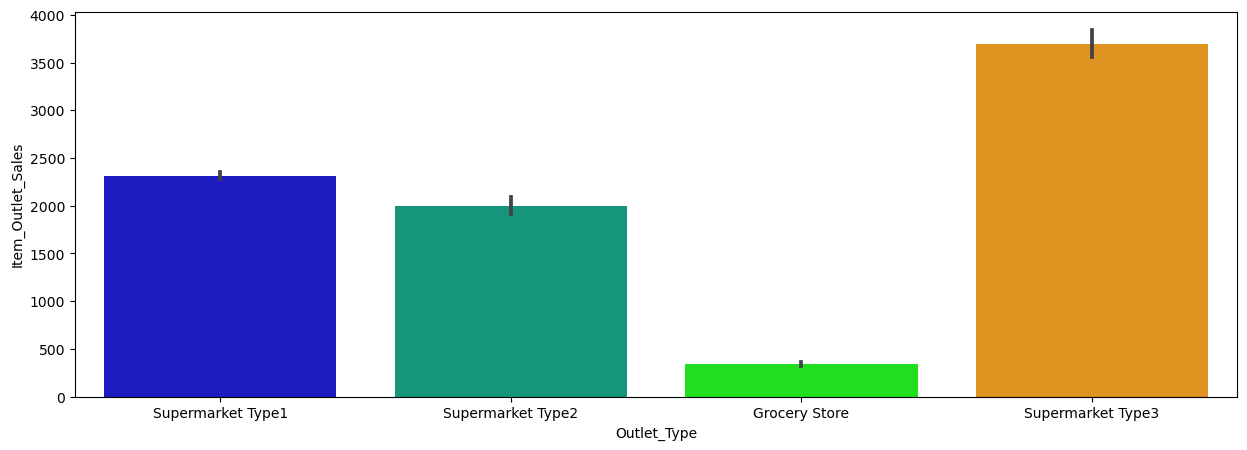

In [32]:
plt.figure(figsize=(15,5))
sns.barplot(x=tr['Outlet_Type'] ,y=tr['Item_Outlet_Sales'],palette='nipy_spectral')
plt.xlabel('Outlet_Type')
plt.show()

Suprisingly supermarket type 3 is the most profitable and not type 1.

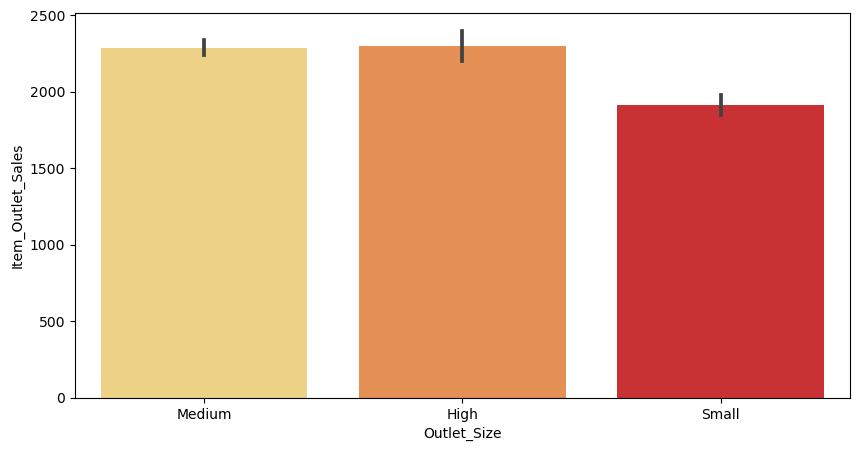

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(x=tr['Outlet_Size'] ,y=tr['Item_Outlet_Sales'],palette='YlOrRd')
plt.xlabel('Outlet_Size')
plt.show()

Medium and high outlet sizes are pretty much even in sales

<Axes: >

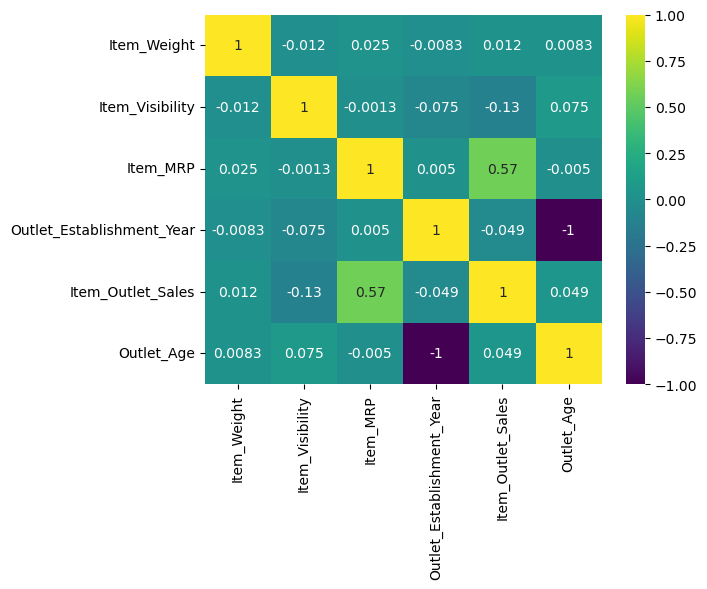

In [34]:
#corraliton martix
sns.heatmap(tr.corr() ,cmap='viridis',annot=True)

In [35]:
#lable encoding
le = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']
for i in Label:
    tr[i] = le.fit_transform(tr[i])
    te[i] = le.fit_transform(te[i])

tr.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,24
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,14
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,24
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,25
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,36


In [36]:
te.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,FDW58,20.750000,0,0.007565,Snack Foods,107.8622,OUT049,1999,1,0,Supermarket Type1,24
1,FDW14,8.300000,1,0.038428,Dairy,87.3198,OUT017,2007,1,1,Supermarket Type1,16
2,NCN55,14.600000,0,0.099575,Others,241.7538,OUT010,1998,1,2,Grocery Store,25
3,FDQ58,7.315000,0,0.015388,Snack Foods,155.0340,OUT017,2007,1,1,Supermarket Type1,16
4,FDY38,12.695633,1,0.118599,Dairy,234.2300,OUT027,1985,1,2,Supermarket Type3,38


In [37]:
#OneHotencoding
tr_oh=pd.get_dummies(tr,columns=['Item_Type','Outlet_Type'])
tr_oh

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.300,0,0.016047,249.8092,OUT049,1999,1,0,3735.1380,...,0,0,0,0,0,0,0,1,0,0
1,DRC01,5.920,1,0.019278,48.2692,OUT018,2009,1,2,443.4228,...,0,0,0,0,1,0,0,0,1,0
2,FDN15,17.500,0,0.016760,141.6180,OUT049,1999,1,0,2097.2700,...,1,0,0,0,0,0,0,1,0,0
3,FDX07,19.200,1,0.000000,182.0950,OUT010,1998,1,2,732.3800,...,0,0,0,0,0,0,1,0,0,0
4,NCD19,8.930,0,0.000000,53.8614,OUT013,1987,0,2,994.7052,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,214.5218,OUT013,1987,0,2,2778.3834,...,0,0,0,1,0,0,0,1,0,0
8519,FDS36,8.380,1,0.046982,108.1570,OUT045,2002,1,1,549.2850,...,0,0,0,0,0,0,0,1,0,0
8520,NCJ29,10.600,0,0.035186,85.1224,OUT035,2004,2,1,1193.1136,...,0,0,0,0,0,0,0,1,0,0
8521,FDN46,7.210,1,0.145221,103.1332,OUT018,2009,1,2,1845.5976,...,0,0,0,1,0,0,0,0,1,0


In [38]:
te_oh=pd.get_dummies(te,columns=['Item_Type','Outlet_Type'])
te_oh

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Age,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDW58,20.750000,0,0.007565,107.8622,OUT049,1999,1,0,24,...,0,0,0,1,0,0,0,1,0,0
1,FDW14,8.300000,1,0.038428,87.3198,OUT017,2007,1,1,16,...,0,0,0,0,0,0,0,1,0,0
2,NCN55,14.600000,0,0.099575,241.7538,OUT010,1998,1,2,25,...,0,1,0,0,0,0,1,0,0,0
3,FDQ58,7.315000,0,0.015388,155.0340,OUT017,2007,1,1,16,...,0,0,0,1,0,0,0,1,0,0
4,FDY38,12.695633,1,0.118599,234.2300,OUT027,1985,1,2,38,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,1,0.013496,141.3154,OUT046,1997,2,0,26,...,0,0,0,1,0,0,0,1,0,0
5677,FDD47,7.600000,1,0.142991,169.1448,OUT018,2009,1,2,14,...,0,0,0,0,0,1,0,0,1,0
5678,NCO17,10.000000,0,0.073529,118.7440,OUT045,2002,1,1,21,...,0,0,0,0,0,0,0,1,0,0
5679,FDJ26,15.300000,1,0.000000,214.6218,OUT017,2007,1,1,16,...,0,0,0,0,0,0,0,1,0,0


In [39]:
tr_oh  = tr_oh.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)
te_oh = te_oh.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [40]:
#train test split 
y = tr_oh['Item_Outlet_Sales']
X = tr_oh.drop('Item_Outlet_Sales', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)


In [41]:
#Linearregression
Le = LinearRegression()

Le.fit(X_train, y_train)
y_predict = Le.predict(X_test)
Le_MAE = MAE(y_test, y_predict)
Le_MSE = MSE(y_test, y_predict)
Le_R2 = R2(y_test, y_predict)

print(f" Mean Absolute Error: {Le_MAE}\n")
print(f" Mean Squared Error: {Le_MSE}\n")
print(f" R^2 Score: {Le_R2}\n")

 Mean Absolute Error: 838.1855816680401

 Mean Squared Error: 1285793.5422420816

 R^2 Score: 0.5592800095247035



In [42]:
#Lasso Regression
LS = Lasso()

LS.fit(X_train,y_train)
y_predict = LS.predict(X_test)

LS_MAE = round(MAE(y_test, y_predict),2)
LS_MSE = round(MSE(y_test, y_predict),2)
LS_R2 = round(R2(y_test, y_predict),4)

print(f" Mean Absolute Error: {LS_MAE}\n")
print(f" Mean Squared Error: {LS_MSE}\n")
print(f" R^2 Score: {LS_R2}\n")


 Mean Absolute Error: 836.37

 Mean Squared Error: 1282399.01

 R^2 Score: 0.5604



In [43]:
#RandomForest Regression
RFR= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)

RFR.fit(X_train, y_train)
y_predict = RFR.predict(X_test)

RFR_MAE = MAE(y_test, y_predict)
RFR_MSE = MSE(y_test, y_predict)
RFR_R2 = R2(y_test, y_predict)

print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R2}\n")

 Mean Absolute Error: 1030.270066465177

 Mean Squared Error: 1964025.6611881126

 R^2 Score: 0.32680843210433885

